# Project Checkpoint 1: Dataset Comparison, Selection, and EDA

**Author:** Keshav Kapur | **UIN:** 237007751

**Goal:** Select a dataset that meaningfully supports one or more data mining techniques covered in this course AND at least one additional technique not covered in the course. Perform exploratory data analysis (data basics, data collection, data cleaning, bias).

# (A) Identification of Candidate Datasets

I identified three candidate datasets in the social media / online community domain. Each aligns with at least one course topic and provides opportunities for external techniques. All three are publicly available for research use.

## Dataset 1: Reddit Hyperlink Network

- **Dataset name and source** – Reddit Hyperlink Network — [SNAP (Stanford Network Analysis Project)](https://snap.stanford.edu/data/soc-RedditHyperlinks.html)
- **Course topic alignment** – Graph mining (directed graph of subreddit-to-subreddit hyperlinks), PageRank (identify influential subreddits), community detection (find clusters of tightly-linked subreddits)
- **Potential external techniques** – Graph Neural Networks / node embeddings (e.g., node2vec, GraphSAGE); temporal network analysis (how the network evolves); signed network analysis (structural balance theory on positive/negative edges)
- **Dataset size and structure** – ~55,000 subreddit nodes, ~858,000 total directed edges across two TSV files (body hyperlinks + title hyperlinks). Each edge carries 86 post-level features and a sentiment label.
- **Data types** – Source subreddit (string), target subreddit (string), post ID (string), timestamp (datetime), sentiment label (-1 or +1), 86 numerical LIWC/sentiment features per edge
- **Target variable(s), if any** – Edge sentiment (`LINK_SENTIMENT`: +1 = positive, -1 = negative); supports supervised edge classification
- **Licensing or usage constraints** – Research/academic use under SNAP's standard terms; data is derived from public Reddit posts

## Dataset 2: Sentiment140 Twitter Dataset

- **Dataset name and source** – Sentiment140 — [Kaggle](https://www.kaggle.com/datasets/kazanova/sentiment140) (original student page was sentiment140.com; dataset is now hosted on Kaggle)
- **Course topic alignment** – Text mining (tokenization, embeddings)
- **Potential external techniques** – Topic modeling (LDA, BERTopic); transformer-based sentiment analysis (BERT/RoBERTa fine-tuning); temporal sentiment trend analysis
- **Dataset size and structure** – 1.6 million tweets in a single flat CSV (~240 MB)
- **Data types** – Tweet text (string), sentiment label (0 = negative, 4 = positive), username (string), timestamp (datetime), query (string)
- **Target variable(s), if any** – Sentiment polarity (binary: 0 or 4), assigned via distant supervision (emoticon-based labeling, not human annotation)
- **Licensing or usage constraints** – Academic/research use

## Dataset 3: Hate Speech and Offensive Language Dataset

- **Dataset name and source** – Hate Speech and Offensive Language — [GitHub (t-davidson)](https://github.com/t-davidson/hate-speech-and-offensive-language)
- **Course topic alignment** – Text mining (embedding on tweet text), clustering
- **Potential external techniques** – Fairness and bias auditing in ML (examining classifier bias across demographic groups); transformer fine-tuning (BERT for hate speech detection); model explainability (LIME/SHAP)
- **Dataset size and structure** – ~25,000 tweets labeled by CrowdFlower annotators, single CSV
- **Data types** – Tweet text (string), 3-class label (hate speech / offensive / neither), annotation vote counts per class, pre-computed TF-IDF features
- **Target variable(s), if any** – 3-class label: hate speech, offensive language, or neither
- **Licensing or usage constraints** – MIT license (code); research use (data)

On my honor, I declare the following resources:

1. **Collaborators:**
- None. 

2. **Web Sources:**
- https://snap.stanford.edu/data/soc-RedditHyperlinks.html: Dataset description, file format, and citation for Reddit Hyperlink Network.
- https://www.kaggle.com/datasets/kazanova/sentiment140: Sentiment140 dataset source (replacement for defunct sentiment140.com).
- https://github.com/t-davidson/hate-speech-and-offensive-language: Hate Speech dataset repo, README, and data description.

3. **AI Tools:**
- Gemini: Used to structure the three dataset descriptions into the required format.

4. **Citation**
- **Paper:** Kumar, S., Hamilton, W.L., Leskovec, J., & Jurafsky, D. (2018). *Community Interaction and Conflict on the Web.* Proceedings of the 2018 World Wide Web Conference (WWW 2018).
- **Paper:** Go, A., Bhayani, R., & Huang, L. (2009). *Twitter Sentiment Classification using Distant Supervision.* Stanford University Technical Report.
- **Paper:** Davidson, T., Warmsley, D., Macy, M., & Weber, I. (2017). *Automated Hate Speech Detection and the Problem of Offensive Language.* Proceedings of the 11th International AAAI Conference on Web and Social Media (ICWSM 2017).


# (B) Comparative Analysis of Datasets

| Dimension | Reddit Hyperlink Network | Sentiment140 | Hate Speech (Davidson et al.) |
|-----------|--------------------------|--------------|-------------------------------|
| **Supported data mining tasks** | Graph mining, PageRank, community detection (course); GNNs / node embeddings, temporal network analysis, signed graph analysis (external) | Text mining, embeddings, classification (course); Topic modeling (LDA/BERTopic), transformer-based sentiment (external) | Text mining, clustering, classification (course); Fairness/bias auditing, model explainability via LIME/SHAP, transformer fine-tuning (external) |
| **Data quality issues** | Sentiment annotation noise (crowdsourced labels); potential missing hyperlinks (not all cross-posts captured); temporal sparsity in early time periods; some subreddits may have been deleted or renamed | Noisy text (abbreviations, slang, URLs, emojis); distant supervision labels (emoticon-based, not human-verified) introduce systematic label noise; no neutral class | Small dataset (25K); crowdsourced annotator disagreement; conflation of "offensive" and "hate speech" categories; lexicon-based tweet sampling introduces selection bias |
| **Algorithmic feasibility** | ~55K nodes / ~858K edges fits comfortably in memory; NetworkX handles graphs of this scale (verified in HW3 with wiki-Vote); Louvain community detection runs in seconds; node2vec libraries available | 1.6M rows fits in ~500 MB RAM; TF-IDF and LDA scale well; BERT fine-tuning feasible on a subsample (50K–100K tweets) | 25K rows — any method works at this scale; BERT fine-tuning easy; LIME/SHAP feasible on full dataset |
| **Bias considerations** | English-language subreddits over-represented; popular/large subreddits dominate edge counts; conflict-framing bias (hyperlinks in negative contexts may be more salient); subreddit sampling captures Reddit's demographic skew (younger, male-leaning, US-centric) | Twitter user demographics skew younger and urban; English-only; emoticon-based labeling biases toward users who use emoticons; retweets and bot activity not filtered | Annotator racial and cultural bias; lexicon-based sampling over-selects tweets containing slur terms regardless of context; "offensive" vs. "hate speech" boundary is subjective and culturally dependent |
| **Ethical considerations** | Analyzing inter-community conflict could stigmatize specific subreddits; subreddit names are public but aggregated analysis reduces individual privacy risk; findings could be misused to target communities | Tweets are public but users did not consent to sentiment analysis; potential to profile individuals; reproducing tweets in a paper may violate user expectations of ephemerality | Hate speech content exposure harms annotators and researchers; classifiers risk disproportionately flagging African American English (AAE) as offensive; power dynamics between platforms/moderators and marginalized users |

**Your Resources (Section B):**

On my honor, I declare the following resources:

1. **Collaborators:**
- None.

2. **Web Sources:**
- https://snap.stanford.edu/data/soc-RedditHyperlinks.html: Confirmed scale (nodes/edges) and structure for the comparison table.
- https://www.kaggle.com/datasets/kazanova/sentiment140: Verified Sentiment140 size (1.6M tweets) and column schema for feasibility/bias notes.
- https://github.com/t-davidson/hate-speech-and-offensive-language: Checked hate-speech dataset size, labels, and known bias caveats for the comparative analysis.

3. **AI Tools:**
- Gemini: used for consistent terminology and formatting into the table.

# (C) Dataset Selection

### Selected: Reddit Hyperlink Network

### Reasons

1. The dataset is a directed, signed, temporal graph with directly supporting graph mining, PageRank, and community detection. I can also construct "co-link baskets" (sets of target subreddits linked from the same source) to apply Apriori / association rules (HW2). This dual alignment across two major course topics is stronger than either text-only alternative.

2. The dataset enables at least three techniques not covered in class:
   - *Graph Neural Networks / node embeddings* (e.g., node2vec): learn subreddit representations from link structure, with existing Python libraries available.
   - *Temporal network analysis*: study how the subreddit interaction network evolves over time.
   - *Signed network analysis*: the positive/negative edge labels enable structural balance theory and signed spectral methods.

3. At ~55K nodes and ~858K edges, the graph fits comfortably in memory and can be processed with NetworkX.

4. Each edge carries 86 LIWC and sentiment features extracted from the post text, enabling feature-based analysis and edge sentiment prediction without needing raw text processing infrastructure.

5. Degree distributions, community structure, temporal growth, sentiment patterns across communities, and subreddit co-link patterns all produce meaningful and interpretable visualizations.

### Trade-offs

- The 86 features are pre-extracted from post text; I cannot perform my own tokenization, or embedding pipeline on raw text. This limits the NLP depth compared to Sentiment140 or the Hate Speech dataset.
- The primary target variable is binary edge sentiment (+1 / -1); there is no multi-class or regression target.
- Reddit's user base and the dataset's subreddit coverage skew heavily toward English-language communities.
- The graph is at the subreddit level, so user-level behavior analysis is not possible.

**Your Resources (Section C):**

On my honor, I declare the following resources:

1. **Collaborators:**
- None.

2. **Web Sources:**
- https://snap.stanford.edu/data/soc-RedditHyperlinks.html: Re-read dataset description to justify selecting Reddit over Sentiment140 and Hate Speech (graph + association rules alignment).

3. **AI Tools:**
- Gemini: Refined the "Reasons" and "Trade-offs" bullets from what I wrote.

# (D) Exploratory Data Analysis — Reddit Hyperlink Network

## D.1 Setup and Data Loading

I load both the **body** and **title** TSV files from the SNAP Reddit hyperlink dataset. The dataset provides both; I use **body** for the main analysis because links in post bodies are more substantive than title-only links. Loading both files lets me verify columns and shape before committing to body for downstream steps.

I use a single `DATA_DIR` and download each file only if it is not already present, then load both into dataframes to inspect structure and choose body for the rest of Part D.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from collections import Counter
import ast
import os
import warnings

warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["figure.dpi"] = 100

print("All imports loaded successfully.")

All imports loaded successfully.


In [9]:
import urllib.request

DATA_DIR = "data"
os.makedirs(DATA_DIR, exist_ok=True)

BODY_URL = "https://snap.stanford.edu/data/soc-redditHyperlinks-body.tsv"
TITLE_URL = "https://snap.stanford.edu/data/soc-redditHyperlinks-title.tsv"
BODY_PATH = os.path.join(DATA_DIR, "soc-redditHyperlinks-body.tsv")
TITLE_PATH = os.path.join(DATA_DIR, "soc-redditHyperlinks-title.tsv")

for url, path, name in [
    (BODY_URL, BODY_PATH, "body"),
    (TITLE_URL, TITLE_PATH, "title"),
]:
    if not os.path.exists(path):
        print(f"Downloading {name} file from SNAP...")
        urllib.request.urlretrieve(url, path)
        print(f"  Saved to {path} ({os.path.getsize(path) / 1e6:.1f} MB)")
    else:
        print(f"{name} file already exists at {path} ({os.path.getsize(path) / 1e6:.1f} MB)")

  Saved to data/soc-redditHyperlinks-body.tsv (318.9 MB)
  Saved to data/soc-redditHyperlinks-title.tsv (368.6 MB)


In [10]:
df_body = pd.read_csv(BODY_PATH, sep="\t")
df_title = pd.read_csv(TITLE_PATH, sep="\t")

print(f"Shape: {df_body.shape}")
print(f"Columns: {list(df_body.columns)}")
print(f"Shape: {df_title.shape}")
print(f"Columns: {list(df_title.columns)}")

df_body.head(3)

Shape: (286561, 6)
Columns: ['SOURCE_SUBREDDIT', 'TARGET_SUBREDDIT', 'POST_ID', 'TIMESTAMP', 'LINK_SENTIMENT', 'PROPERTIES']
Shape: (571927, 6)
Columns: ['SOURCE_SUBREDDIT', 'TARGET_SUBREDDIT', 'POST_ID', 'TIMESTAMP', 'LINK_SENTIMENT', 'PROPERTIES']


,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1,"345.0,298.0,0.75652173913,0.0173913043478,0.08..."
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1,"101.0,98.0,0.742574257426,0.019801980198,0.049..."
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1,"85.0,85.0,0.752941176471,0.0235294117647,0.082..."


## D.2 Data Preparation

I use `df_body` (not the title dataframe) as the primary dataframe for the same reason as in D.1: body links are more substantive. I rename `LINK_SENTIMENT` to `POST_LABEL` for clarity, drop `PROPERTIES` to focus EDA on the core columns, and parse `TIMESTAMP` for any time-based checks.

I check for duplicate rows and duplicate (source, target) pairs to justify aggregating to unique directed edges with counts in D.3: many source–target pairs appear in multiple posts, so I collapse them into single edges with weight and average sentiment.

In [11]:
df = df_body.copy()

if "LINK_SENTIMENT" in df.columns:
    df.rename(columns={"LINK_SENTIMENT": "POST_LABEL"}, inplace=True)

print(f"Shape: {df.shape}")
display(df.dtypes)
display(df.drop(columns=["PROPERTIES"]).describe(include="all"))
display(df.isnull().sum())
n_dup = df.duplicated().sum()
print(f"Fully duplicate rows: {n_dup}")
n_multi = df.duplicated(subset=["SOURCE_SUBREDDIT", "TARGET_SUBREDDIT"]).sum()
print(f"Duplicate (source, target) pairs (multi-edges): {n_multi}")

Shape: (286561, 6)


SOURCE_SUBREDDIT      str
TARGET_SUBREDDIT      str
POST_ID               str
TIMESTAMP             str
POST_LABEL          int64
PROPERTIES            str
dtype: object

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,POST_LABEL
count,286561,286561,286561,286561,286561.000000
unique,27863,20606,259092,248453,NaN
top,subredditdrama,askreddit,4asjoos,2014-08-20 14:40:53,NaN
freq,4665,7329,167,360,NaN
mean,NaN,NaN,NaN,NaN,0.852946
std,NaN,NaN,NaN,NaN,0.522000
min,NaN,NaN,NaN,NaN,-1.000000
25%,NaN,NaN,NaN,NaN,1.000000
50%,NaN,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,1.000000


SOURCE_SUBREDDIT    0
TARGET_SUBREDDIT    0
POST_ID             0
TIMESTAMP           0
POST_LABEL          0
PROPERTIES          0
dtype: int64

Fully duplicate rows: 0
Duplicate (source, target) pairs (multi-edges): 148740


In [12]:
df["TIMESTAMP"] = pd.to_datetime(df["TIMESTAMP"])
print(f"Time range: {df['TIMESTAMP'].min()} to {df['TIMESTAMP'].max()}")
print(f"Duration: {df['TIMESTAMP'].max() - df['TIMESTAMP'].min()}")
print()
df[["SOURCE_SUBREDDIT", "TARGET_SUBREDDIT", "POST_ID", "TIMESTAMP", "POST_LABEL"]].head(5)

Time range: 2013-12-31 16:39:58 to 2017-04-30 16:58:21
Duration: 1216 days 00:18:23



,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,POST_LABEL
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1
3,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1
4,playmygame,gamedev,1u4w5ss,2014-01-01 02:51:13,1


## D.3 Graph Construction and Basic Statistics

I built a **directed** graph where each edge is subreddit A linking to subreddit B and aggregated multi-edges by `(SOURCE_SUBREDDIT, TARGET_SUBREDDIT)` so each edge has `weight=n_links` and `avg_sentiment`, which I store for PageRank and sentiment analysis later.

Then, I report density, in/out degree statistics, weakly and strongly connected components (WCC, SCC), and reciprocity as a standard summary for a directed network: these describe connectivity, hub structure, and how mutual linking behaves.

In [13]:
edge_agg = (
    df.groupby(["SOURCE_SUBREDDIT", "TARGET_SUBREDDIT"])
    .agg(
        n_links=("POST_ID", "count"),
        avg_sentiment=("POST_LABEL", "mean"),
        first_link=("TIMESTAMP", "min"),
        last_link=("TIMESTAMP", "max"),
    )
    .reset_index()
)

print(f"Unique directed edges (source -> target): {len(edge_agg):,}")
print(f"Unique subreddits (sources): {df['SOURCE_SUBREDDIT'].nunique():,}")
print(f"Unique subreddits (targets): {df['TARGET_SUBREDDIT'].nunique():,}")

# Build the graph
G = nx.DiGraph()
for _, row in edge_agg.iterrows():
    G.add_edge(
        row["SOURCE_SUBREDDIT"],
        row["TARGET_SUBREDDIT"],
        weight=row["n_links"],
        avg_sentiment=row["avg_sentiment"],
    )

print(f"Nodes: {G.number_of_nodes():,}")
print(f"Edges: {G.number_of_edges():,}")
print(f"Density: {nx.density(G):.6f}")

Unique directed edges (source -> target): 137,821
Unique subreddits (sources): 27,863
Unique subreddits (targets): 20,606
Nodes: 35,776
Edges: 137,821
Density: 0.000108


In [14]:
n_wcc = nx.number_weakly_connected_components(G)
largest_wcc = max(nx.weakly_connected_components(G), key=len)
n_scc = nx.number_strongly_connected_components(G)
largest_scc = max(nx.strongly_connected_components(G), key=len)
in_degrees = [d for _, d in G.in_degree()]
out_degrees = [d for _, d in G.out_degree()]

reciprocity = nx.reciprocity(G)

stats = {
    "Nodes": f"{G.number_of_nodes():,}",
    "Edges (unique directed)": f"{G.number_of_edges():,}",
    "Total hyperlinks (with multi-edges)": f"{len(df):,}",
    "Density": f"{nx.density(G):.6f}",
    "Avg in-degree": f"{np.mean(in_degrees):.2f}",
    "Avg out-degree": f"{np.mean(out_degrees):.2f}",
    "Max in-degree": f"{np.max(in_degrees):,}",
    "Max out-degree": f"{np.max(out_degrees):,}",
    "Median in-degree": f"{np.median(in_degrees):.0f}",
    "Median out-degree": f"{np.median(out_degrees):.0f}",
    "Weakly connected components": f"{n_wcc:,}",
    "Largest WCC size": f"{len(largest_wcc):,} ({100*len(largest_wcc)/G.number_of_nodes():.1f}%)",
    "Strongly connected components": f"{n_scc:,}",
    "Largest SCC size": f"{len(largest_scc):,} ({100*len(largest_scc)/G.number_of_nodes():.1f}%)",
    "Reciprocity": f"{reciprocity:.4f}",
}

stats_df = pd.DataFrame(list(stats.items()), columns=["Metric", "Value"])
display(stats_df)

,Metric,Value
0,Nodes,"35,776"
1,Edges (unique directed),"137,821"
2,Total hyperlinks (with multi-edges),"286,561"
3,Density,0.000108
4,Avg in-degree,3.85
5,Avg out-degree,3.85
6,Max in-degree,"2,161"
7,Max out-degree,"1,350"
8,Median in-degree,1
9,Median out-degree,1


## D.4 Degree Distributions

I plotted both **in-degree** (how many subreddits link *to* this one) and **out-degree** (how many subreddits this one links *from*). I used a log scale on the y-axis because degree distributions are typically heavy-tailed. The shapes indicate hub subreddits (high in-degree) versus broad or narrow linkers (out-degree patterns).

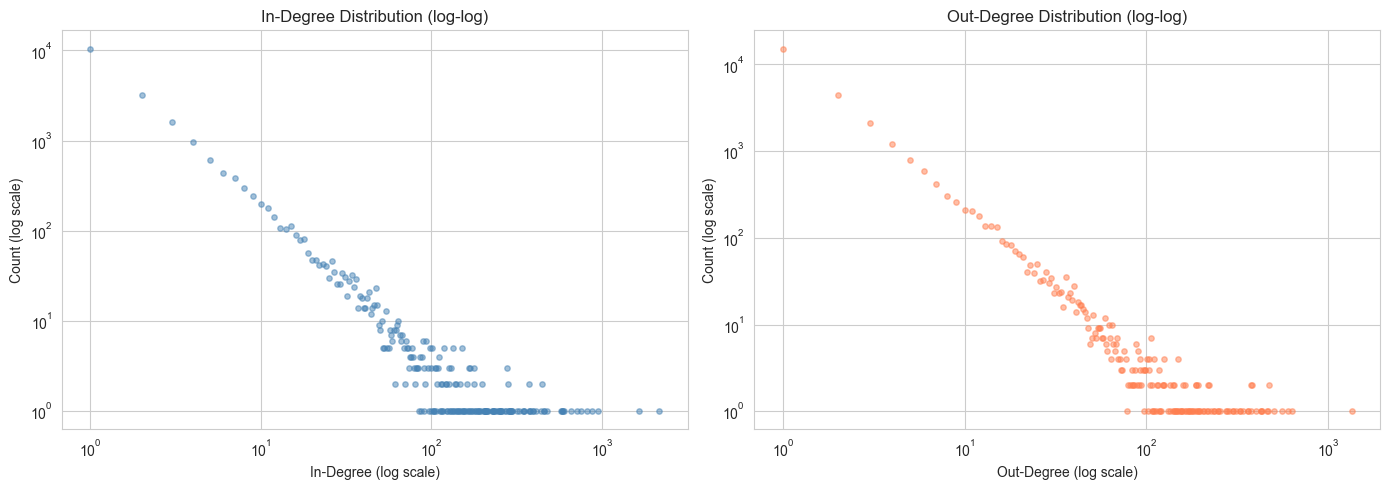

Both distributions appear roughly linear on log-log axes, consistent with a
power-law / heavy-tailed distribution typical of social networks.


In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for ax, degrees, label, color in [
    (axes[0], in_degrees, "In-Degree", "steelblue"),
    (axes[1], out_degrees, "Out-Degree", "coral"),
]:
    # Filter out zero-degree nodes for log scale
    nonzero = [d for d in degrees if d > 0]
    counts = Counter(nonzero)
    x = sorted(counts.keys())
    y = [counts[k] for k in x]

    ax.scatter(x, y, alpha=0.5, s=15, color=color)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel(f"{label} (log scale)")
    ax.set_ylabel("Count (log scale)")
    ax.set_title(f"{label} Distribution (log-log)")

plt.tight_layout()
plt.show()

print("Both distributions appear roughly linear on log-log axes, consistent with a")
print("power-law / heavy-tailed distribution typical of social networks.")

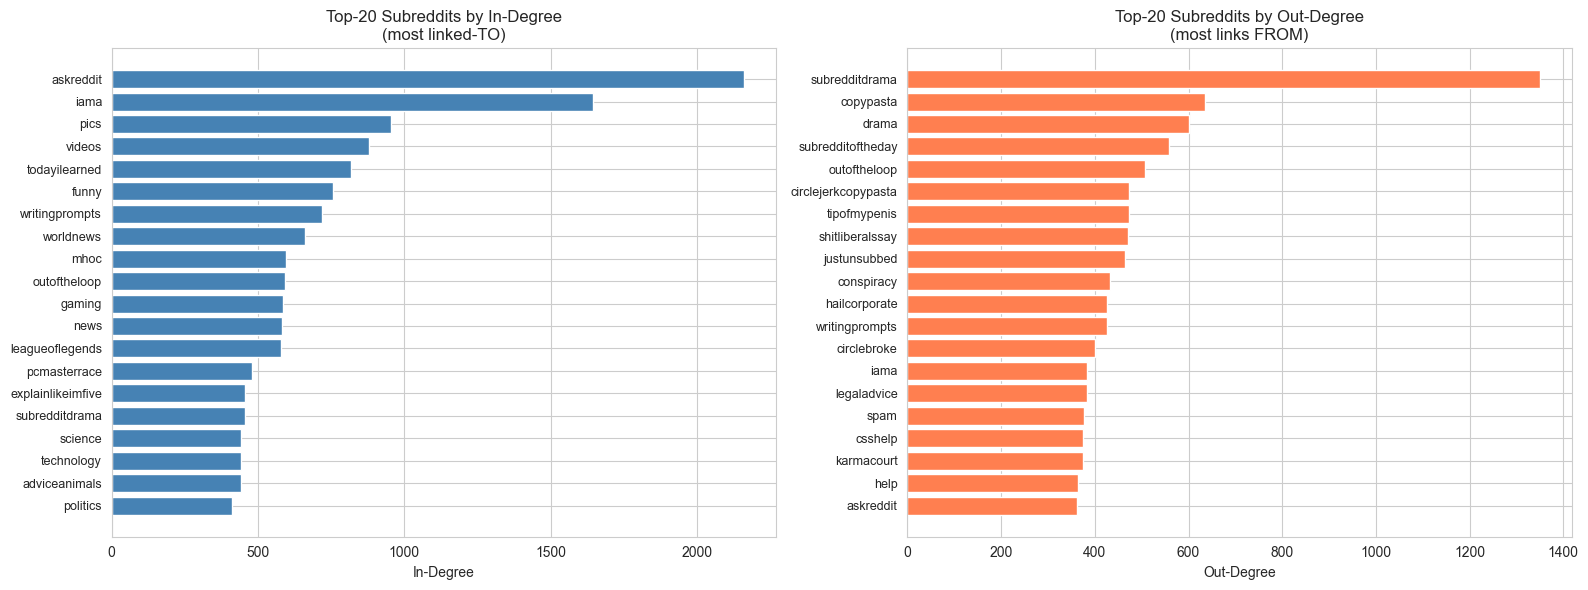

In [16]:
in_deg = dict(G.in_degree())
out_deg = dict(G.out_degree())

top_in = sorted(in_deg.items(), key=lambda x: x[1], reverse=True)[:20]
top_out = sorted(out_deg.items(), key=lambda x: x[1], reverse=True)[:20]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

names_in, vals_in = zip(*top_in)
axes[0].barh(range(len(names_in)), vals_in, color="steelblue")
axes[0].set_yticks(range(len(names_in)))
axes[0].set_yticklabels(names_in, fontsize=9)
axes[0].invert_yaxis()
axes[0].set_xlabel("In-Degree")
axes[0].set_title("Top-20 Subreddits by In-Degree\n(most linked-TO)")

names_out, vals_out = zip(*top_out)
axes[1].barh(range(len(names_out)), vals_out, color="coral")
axes[1].set_yticks(range(len(names_out)))
axes[1].set_yticklabels(names_out, fontsize=9)
axes[1].invert_yaxis()
axes[1].set_xlabel("Out-Degree")
axes[1].set_title("Top-20 Subreddits by Out-Degree\n(most links FROM)")

plt.tight_layout()
plt.show()

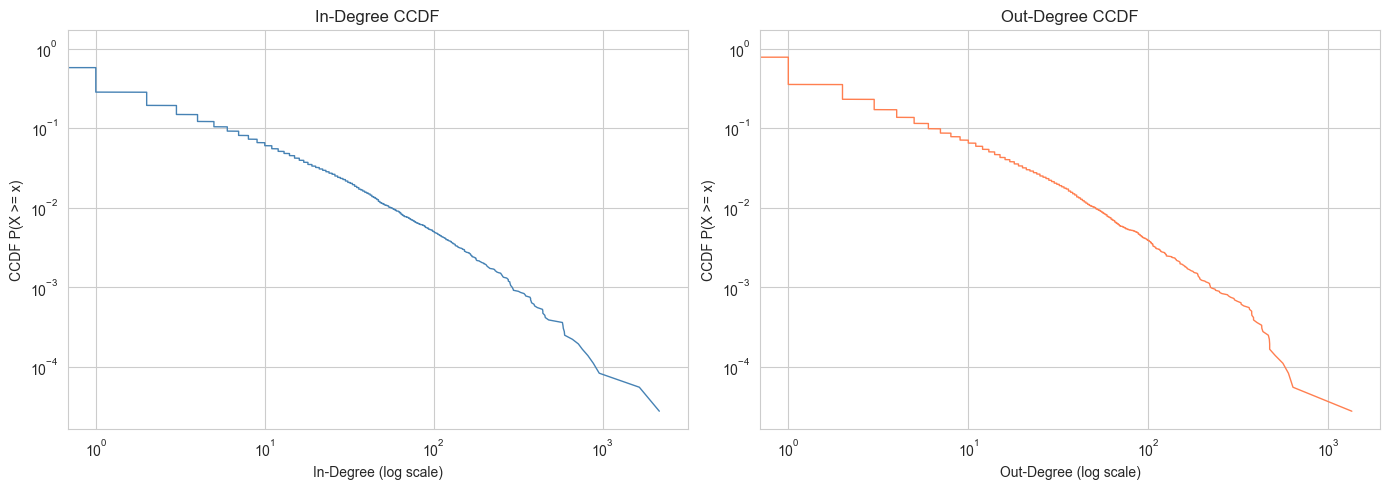

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for ax, degrees, label, color in [
    (axes[0], in_degrees, "In-Degree", "steelblue"),
    (axes[1], out_degrees, "Out-Degree", "coral"),
]:
    sorted_deg = np.sort(degrees)[::-1]
    ccdf = np.arange(1, len(sorted_deg) + 1) / len(sorted_deg)
    ax.plot(sorted_deg, ccdf, color=color, linewidth=1)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel(f"{label} (log scale)")
    ax.set_ylabel("CCDF P(X >= x)")
    ax.set_title(f"{label} CCDF")

plt.tight_layout()
plt.show()

## D.5 Sentiment Distribution

I analyzed **POST_LABEL** (edge sentiment): +1 = positive link, -1 = negative link. Sentiment is aggregated per edge in the graph as `avg_sentiment` and can be summarized per subreddit or across the network. A skew toward positive or negative links indicates whether the network is mostly supportive or conflict-oriented.

POST_LABEL
-1     21070
 1    265491
Name: count, dtype: int64


Positive fraction: 0.926
Negative fraction: 0.074


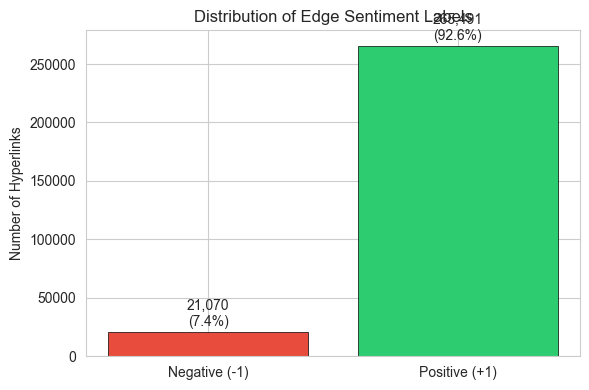

In [18]:
sentiment_counts = df["POST_LABEL"].value_counts().sort_index()
display(sentiment_counts)
print(f"\nPositive fraction: {(df['POST_LABEL'] == 1).mean():.3f}")
print(f"Negative fraction: {(df['POST_LABEL'] == -1).mean():.3f}")

fig, ax = plt.subplots(figsize=(6, 4))
colors = ["#e74c3c", "#2ecc71"]
labels = ["Negative (-1)", "Positive (+1)"]
ax.bar(labels, sentiment_counts.values, color=colors, edgecolor="black", linewidth=0.5)
ax.set_ylabel("Number of Hyperlinks")
ax.set_title("Distribution of Edge Sentiment Labels")
for i, v in enumerate(sentiment_counts.values):
    ax.text(i, v + 5000, f"{v:,}\n({v/len(df)*100:.1f}%)", ha="center", fontsize=10)
plt.tight_layout()
plt.show()

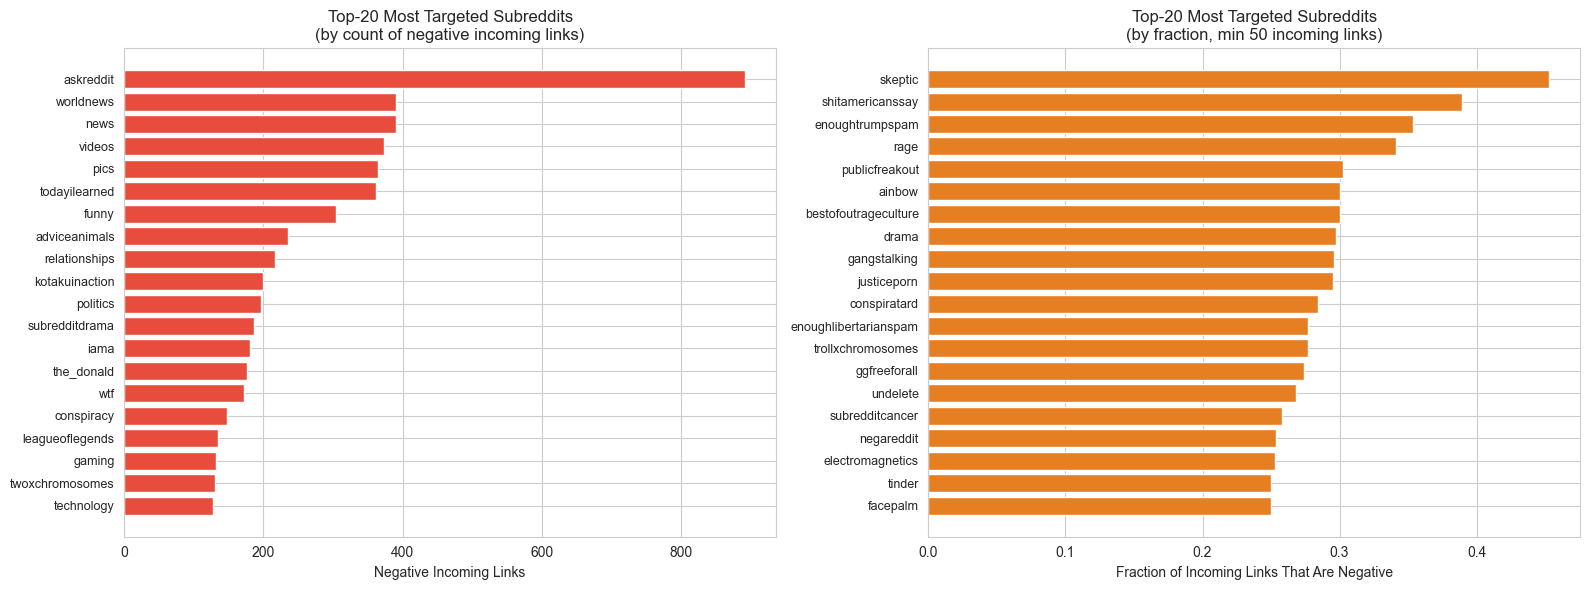

In [19]:
neg_edges = df[df["POST_LABEL"] == -1]
all_edges = df.copy()

# Count incoming negative edges per target subreddit
neg_in = neg_edges.groupby("TARGET_SUBREDDIT").size().rename("neg_incoming")
total_in = all_edges.groupby("TARGET_SUBREDDIT").size().rename("total_incoming")

target_stats = pd.concat([neg_in, total_in], axis=1).fillna(0)
target_stats["neg_frac"] = target_stats["neg_incoming"] / target_stats["total_incoming"]
# Filter to subreddits with at least 50 incoming links (avoid noisy fractions)
target_stats_filtered = target_stats[target_stats["total_incoming"] >= 50].sort_values(
    "neg_frac", ascending=False
)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Most negative incoming (by count)
top_neg_count = neg_in.sort_values(ascending=False).head(20)
axes[0].barh(range(len(top_neg_count)), top_neg_count.values, color="#e74c3c")
axes[0].set_yticks(range(len(top_neg_count)))
axes[0].set_yticklabels(top_neg_count.index, fontsize=9)
axes[0].invert_yaxis()
axes[0].set_xlabel("Negative Incoming Links")
axes[0].set_title("Top-20 Most Targeted Subreddits\n(by count of negative incoming links)")

# Most negative incoming (by fraction, min 50 total)
top_neg_frac = target_stats_filtered.head(20)
axes[1].barh(range(len(top_neg_frac)), top_neg_frac["neg_frac"].values, color="#e67e22")
axes[1].set_yticks(range(len(top_neg_frac)))
axes[1].set_yticklabels(top_neg_frac.index, fontsize=9)
axes[1].invert_yaxis()
axes[1].set_xlabel("Fraction of Incoming Links That Are Negative")
axes[1].set_title("Top-20 Most Targeted Subreddits\n(by fraction, min 50 incoming links)")

plt.tight_layout()
plt.show()

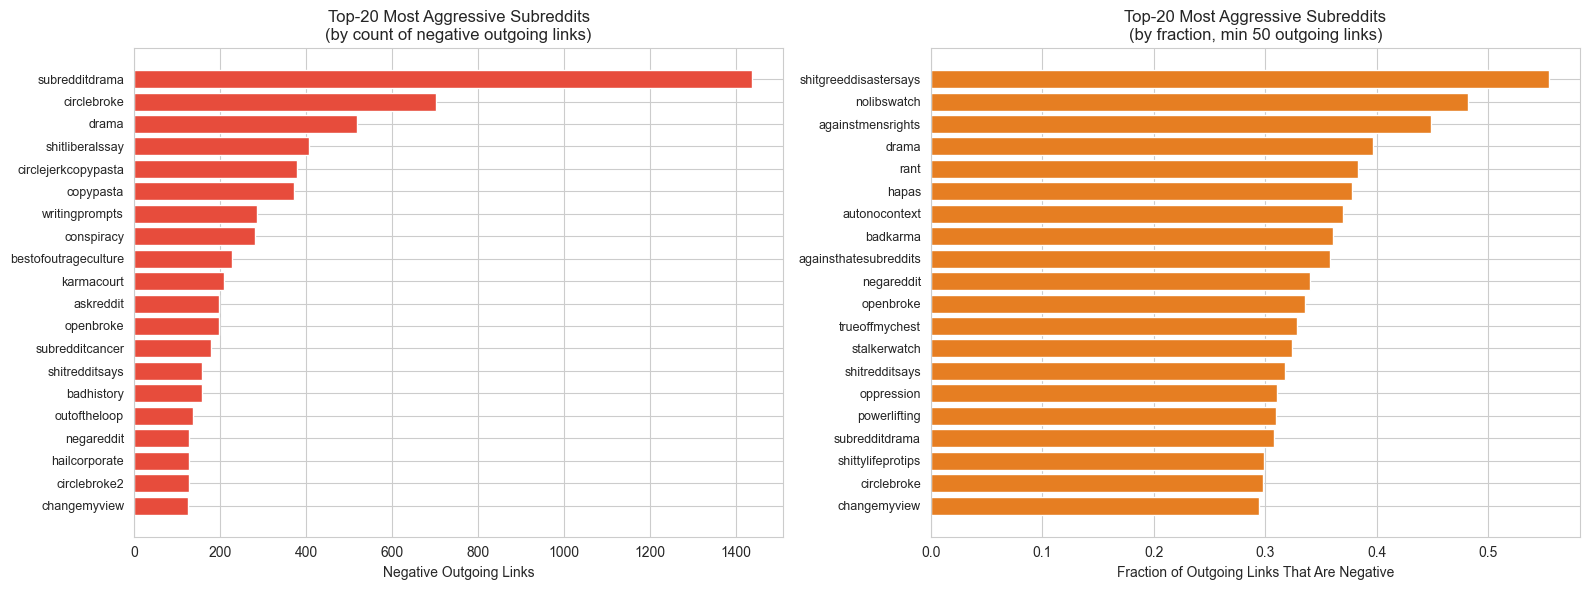

In [20]:
neg_out = neg_edges.groupby("SOURCE_SUBREDDIT").size().rename("neg_outgoing")
total_out = all_edges.groupby("SOURCE_SUBREDDIT").size().rename("total_outgoing")

source_stats = pd.concat([neg_out, total_out], axis=1).fillna(0)
source_stats["neg_frac"] = source_stats["neg_outgoing"] / source_stats["total_outgoing"]
source_stats_filtered = source_stats[source_stats["total_outgoing"] >= 50].sort_values(
    "neg_frac", ascending=False
)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Most negative outgoing (by count)
top_neg_out_count = neg_out.sort_values(ascending=False).head(20)
axes[0].barh(range(len(top_neg_out_count)), top_neg_out_count.values, color="#e74c3c")
axes[0].set_yticks(range(len(top_neg_out_count)))
axes[0].set_yticklabels(top_neg_out_count.index, fontsize=9)
axes[0].invert_yaxis()
axes[0].set_xlabel("Negative Outgoing Links")
axes[0].set_title("Top-20 Most Aggressive Subreddits\n(by count of negative outgoing links)")

# Most negative outgoing (by fraction, min 50 total)
top_neg_out_frac = source_stats_filtered.head(20)
axes[1].barh(range(len(top_neg_out_frac)), top_neg_out_frac["neg_frac"].values, color="#e67e22")
axes[1].set_yticks(range(len(top_neg_out_frac)))
axes[1].set_yticklabels(top_neg_out_frac.index, fontsize=9)
axes[1].invert_yaxis()
axes[1].set_xlabel("Fraction of Outgoing Links That Are Negative")
axes[1].set_title("Top-20 Most Aggressive Subreddits\n(by fraction, min 50 outgoing links)")

plt.tight_layout()
plt.show()

## D.6 PageRank Analysis

I used **PageRank** to measure “importance” in the directed hyperlink graph: nodes that receive links from other important nodes rank higher and used the standard damping factor **alpha=0.85** and no personalization vector for simplicity. Comparing PageRank with in-degree shows how authority-style importance (PageRank) differs from raw “linked-to” count (in-degree).

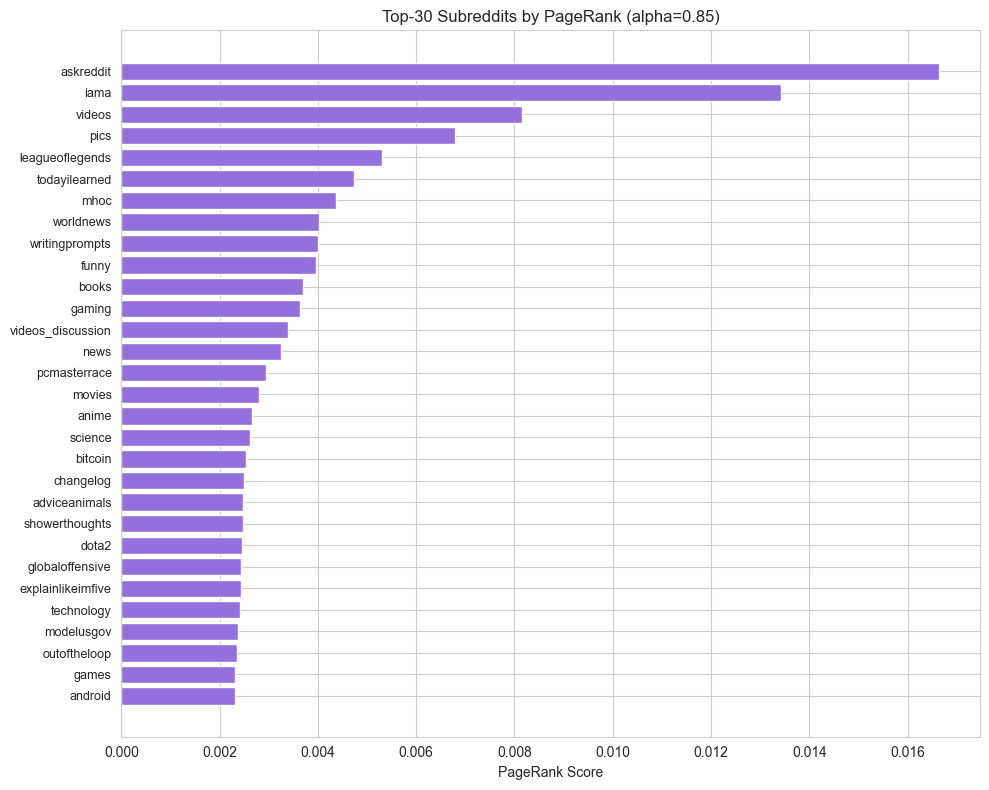

In [21]:
pr = nx.pagerank(G, alpha=0.85)

# Top-30 by PageRank
top_pr = sorted(pr.items(), key=lambda x: x[1], reverse=True)[:30]
pr_names, pr_vals = zip(*top_pr)

fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(range(len(pr_names)), pr_vals, color="mediumpurple")
ax.set_yticks(range(len(pr_names)))
ax.set_yticklabels(pr_names, fontsize=9)
ax.invert_yaxis()
ax.set_xlabel("PageRank Score")
ax.set_title("Top-30 Subreddits by PageRank (alpha=0.85)")
plt.tight_layout()
plt.show()

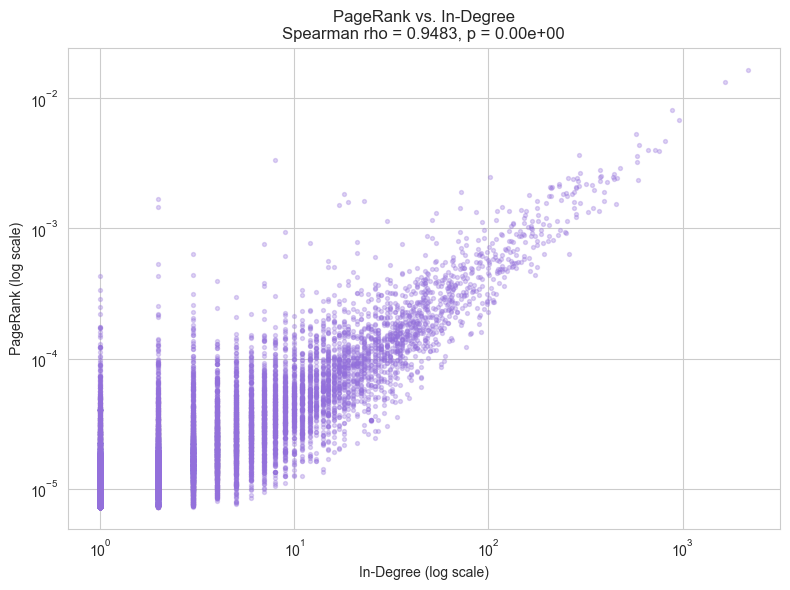

Spearman rank correlation: 0.9483
P-value: 0.00e+00

Subreddits with highest positive rank difference (higher PageRank than in-degree suggests):


,in_degree,pagerank,pr_rank,id_rank,rank_diff
iraqconflict,1,0.000430,264.0,15363.5,-15099.5
discussionarchive,1,0.000339,345.0,15363.5,-15018.5
freebietalk,1,0.000288,413.0,15363.5,-14950.5
laexploratorybrigade,1,0.000248,480.0,15363.5,-14883.5
mholamendments,1,0.000221,547.0,15363.5,-14816.5
mhoirmanifestos,1,0.000176,696.0,15363.5,-14667.5
centralstatechambers,1,0.000175,702.0,15363.5,-14661.5
lifewithigor,1,0.000172,715.0,15363.5,-14648.5
dailyprogrammer_ideas,1,0.000170,722.0,15363.5,-14641.5
forgethehorizons,1,0.000160,771.0,15363.5,-14592.5



Subreddits with highest negative rank difference (lower PageRank than in-degree suggests):


,in_degree,pagerank,pr_rank,id_rank,rank_diff
biggerthanyouthought,5,0.000008,19003.0,4024.5,14978.5
whiteknighting,5,0.000008,18762.0,4024.5,14737.5
awfullypunchablefaces,5,0.000008,18412.0,4024.5,14387.5
nazihunting,5,0.000008,18357.0,4024.5,14332.5
madlads,5,0.000008,18117.0,4024.5,14092.5
theworstgeneration,3,0.000007,19972.0,6096.5,13875.5
badliterature,3,0.000007,19848.0,6096.5,13751.5
therecordcorrected,6,0.000009,17141.0,3498.0,13643.0
nope,3,0.000007,19720.0,6096.5,13623.5
conservatives,3,0.000007,19712.0,6096.5,13615.5


In [22]:
from scipy.stats import spearmanr

pr_series = pd.Series(pr, name="pagerank")
in_deg_series = pd.Series(dict(G.in_degree()), name="in_degree")

comparison = pd.concat([pr_series, in_deg_series], axis=1).dropna()

rho, pval = spearmanr(comparison["pagerank"], comparison["in_degree"])

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(comparison["in_degree"], comparison["pagerank"], alpha=0.3, s=8, color="mediumpurple")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("In-Degree (log scale)")
ax.set_ylabel("PageRank (log scale)")
ax.set_title(f"PageRank vs. In-Degree\nSpearman rho = {rho:.4f}, p = {pval:.2e}")
plt.tight_layout()
plt.show()

print(f"Spearman rank correlation: {rho:.4f}")
print(f"P-value: {pval:.2e}")
print()
# Show subreddits where PageRank rank differs most from in-degree rank
comparison["pr_rank"] = comparison["pagerank"].rank(ascending=False)
comparison["id_rank"] = comparison["in_degree"].rank(ascending=False)
comparison["rank_diff"] = comparison["pr_rank"] - comparison["id_rank"]

print("Subreddits with highest positive rank difference (higher PageRank than in-degree suggests):")
display(comparison.nsmallest(10, "rank_diff")[["in_degree", "pagerank", "pr_rank", "id_rank", "rank_diff"]])
print()
print("Subreddits with highest negative rank difference (lower PageRank than in-degree suggests):")
display(comparison.nlargest(10, "rank_diff")[["in_degree", "pagerank", "pr_rank", "id_rank", "rank_diff"]])

## D.7 Community Detection

I use **Louvain** community detection: it is scalable and does not require choosing the number of communities in advance. Louvain in NetworkX operates on undirected graphs, so I use an **undirected** copy of the graph and set **seed=42** for reproducibility. The resulting communities can be interpreted as topical or behavioral clusters of subreddits that link to each other more densely than to the rest of the network.

Number of communities detected: 560
Largest community: 5,881 subreddits
Smallest community: 2 subreddit(s)
Median community size: 2
Mean community size: 63.9



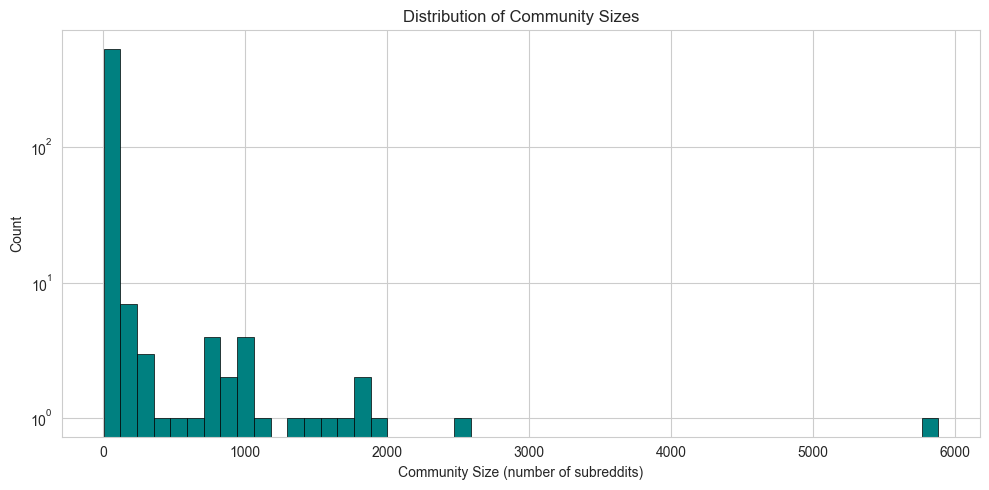

In [23]:
G_undirected = G.to_undirected()

communities = nx.community.louvain_communities(G_undirected, seed=42)

print(f"Number of communities detected: {len(communities)}")

# Community size distribution
comm_sizes = [len(c) for c in communities]
comm_sizes_sorted = sorted(comm_sizes, reverse=True)

print(f"Largest community: {comm_sizes_sorted[0]:,} subreddits")
print(f"Smallest community: {comm_sizes_sorted[-1]:,} subreddit(s)")
print(f"Median community size: {np.median(comm_sizes):.0f}")
print(f"Mean community size: {np.mean(comm_sizes):.1f}")
print()

# Community size histogram
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(comm_sizes, bins=50, color="teal", edgecolor="black", linewidth=0.5)
ax.set_xlabel("Community Size (number of subreddits)")
ax.set_ylabel("Count")
ax.set_title("Distribution of Community Sizes")
ax.set_yscale("log")
plt.tight_layout()
plt.show()

In [24]:
node_to_comm = {}
for i, comm in enumerate(communities):
    for node in comm:
        node_to_comm[node] = i

# Sort communities by size
sorted_comms = sorted(enumerate(communities), key=lambda x: len(x[1]), reverse=True)

for rank, (comm_id, members) in enumerate(sorted_comms[:5]):
    # Get top subreddits by total degree within this community
    sub_G = G_undirected.subgraph(members)
    top_nodes = sorted(sub_G.degree(), key=lambda x: x[1], reverse=True)[:10]
    top_names = [n for n, d in top_nodes]
    print(f"Community {rank+1} (id={comm_id}): {len(members):,} subreddits")
    print(f"  Top members by degree: {', '.join(top_names)}")
    print()

Community 1 (id=115): 5,881 subreddits
  Top members by degree: askreddit, subredditdrama, pics, conspiracy, outoftheloop, todayilearned, funny, the_donald, videos, worldnews

Community 2 (id=28): 2,533 subreddits
  Top members by degree: tipofmypenis, relationships, legaladvice, sex, offmychest, raisedbynarcissists, personalfinance, depression, dirtypenpals, nofap

Community 3 (id=8): 1,998 subreddits
  Top members by degree: techsupport, pcmasterrace, android, buildapc, sysadmin, oculus, jailbreak, androidquestions, linux, linuxquestions

Community 4 (id=13): 1,843 subreddits
  Top members by degree: games, destinythegame, smashbros, ps4, xboxone, mmorpg, guildwars2, nintendo, ffxiv, eve

Community 5 (id=1): 1,820 subreddits
  Top members by degree: iama, movies, sandersforpresident, respectthreads, fantheories, whowouldwin, starwars, redditrequest, harrypotter, asksciencefiction



## D.8 Subreddit Co-Link Pattern Mining (Frequent Itemsets)

This section connects the graph dataset back to **Apriori and association rules** from HW2. For each source subreddit, the set of target subreddits it links to forms a “basket”; I then mine frequent itemsets to find which target subreddits are frequently co-linked from the same source.

**Parameters:** I use **min_support=0.03** so itemsets appear in at least 3% of baskets (balance between signal and noise). I restricted it to the top-200 target subreddits by frequency and filter to baskets with at least two of those targets to keep the one-hot matrix manageable and focus on popular co-link patterns. Only frequent itemsets are mined here (no association rules / min_confidence).


Number of baskets (source subreddits): 27,863
Basket size range: 1 to 1350
Mean basket size: 4.9
Median basket size: 1


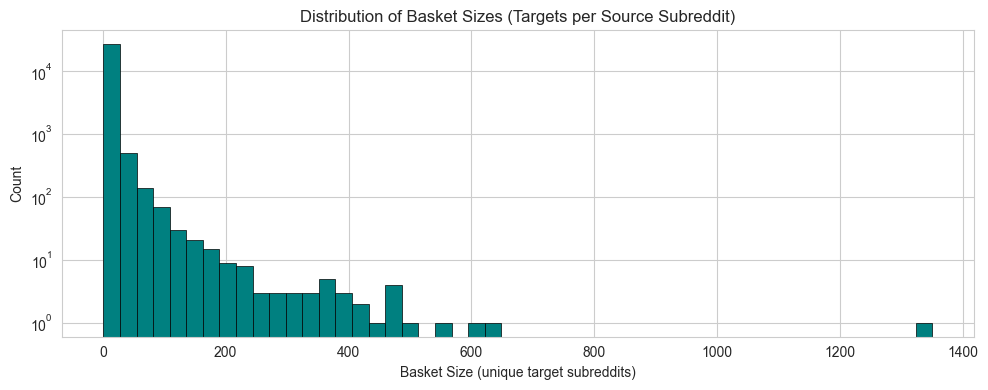

In [25]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Build baskets: for each source subreddit, collect the unique target subreddits
baskets = (
    df.groupby("SOURCE_SUBREDDIT")["TARGET_SUBREDDIT"]
    .apply(lambda x: list(set(x)))
    .tolist()
)

print(f"Number of baskets (source subreddits): {len(baskets):,}")
basket_sizes = [len(b) for b in baskets]
print(f"Basket size range: {min(basket_sizes)} to {max(basket_sizes)}")
print(f"Mean basket size: {np.mean(basket_sizes):.1f}")
print(f"Median basket size: {np.median(basket_sizes):.0f}")

fig, ax = plt.subplots(figsize=(10, 4))
ax.hist(basket_sizes, bins=50, color="teal", edgecolor="black", linewidth=0.5)
ax.set_xlabel("Basket Size (unique target subreddits)")
ax.set_ylabel("Count")
ax.set_title("Distribution of Basket Sizes (Targets per Source Subreddit)")
ax.set_yscale("log")
plt.tight_layout()
plt.show()

In [26]:
all_targets = [t for basket in baskets for t in basket]
target_counts = Counter(all_targets)
top_targets = set(t for t, _ in target_counts.most_common(200))

# Filter baskets to only include top targets
filtered_baskets = [[t for t in basket if t in top_targets] for basket in baskets]
filtered_baskets = [b for b in filtered_baskets if len(b) >= 2]  # need at least 2 items

print(f"Baskets after filtering (>= 2 top-200 targets): {len(filtered_baskets):,}")

# One-hot encode
te = TransactionEncoder()
te_array = te.fit_transform(filtered_baskets)
basket_df = pd.DataFrame(te_array, columns=te.columns_)

print(f"One-hot matrix shape: {basket_df.shape}")
print(f"Sparsity: {1 - basket_df.values.mean():.3f}")

# Run Apriori
freq_itemsets = apriori(basket_df, min_support=0.03, use_colnames=True)
freq_itemsets["length"] = freq_itemsets["itemsets"].apply(len)
print(f"\nFrequent itemsets found: {len(freq_itemsets)}")
print(f"  1-itemsets: {(freq_itemsets['length'] == 1).sum()}")
print(f"  2-itemsets: {(freq_itemsets['length'] == 2).sum()}")
print(f"  3-itemsets: {(freq_itemsets['length'] == 3).sum()}")

# Show top 2-itemsets
pairs = freq_itemsets[freq_itemsets["length"] == 2].sort_values("support", ascending=False)
for _, row in pairs.head(15).iterrows():
    items = sorted(row["itemsets"])
    print(f"  {items[0]:30s} + {items[1]:30s}  (support = {row['support']:.3f})")

Baskets after filtering (>= 2 top-200 targets): 5,462
One-hot matrix shape: (5462, 200)
Sparsity: 0.967

Frequent itemsets found: 232
  1-itemsets: 64
  2-itemsets: 101
  3-itemsets: 57
  askreddit                      + iama                            (support = 0.114)
  askreddit                      + pics                            (support = 0.092)
  askreddit                      + todayilearned                   (support = 0.087)
  askreddit                      + videos                          (support = 0.079)
  askreddit                      + funny                           (support = 0.076)
  askreddit                      + worldnews                       (support = 0.070)
  iama                           + videos                          (support = 0.066)
  iama                           + pics                            (support = 0.065)
  askreddit                      + news                            (support = 0.064)
  iama                           + todayilearned 

In [27]:
if len(freq_itemsets) > 0 and (freq_itemsets["length"] >= 2).any():
    rules = association_rules(freq_itemsets, metric="confidence", min_threshold=0.3)
    rules = rules.sort_values("lift", ascending=False)

    print(f"Association rules found: {len(rules)}")
    for _, row in rules.head(15).iterrows():
        ant = ", ".join(sorted(row["antecedents"]))
        con = ", ".join(sorted(row["consequents"]))
        print(
            f"  {ant:30s} -> {con:30s}  "
            f"(conf={row['confidence']:.3f}, lift={row['lift']:.2f}, sup={row['support']:.3f})"
        )
else:
    print("No multi-item frequent itemsets found — try lowering min_support.")

Association rules found: 436
  mhocpress                      -> mhoc                            (conf=0.953, lift=16.22, sup=0.030)
  mhoc                           -> mhocpress                       (conf=0.511, lift=16.22, sup=0.030)
  todayilearned, videos          -> askreddit, worldnews            (conf=0.543, lift=7.78, sup=0.030)
  askreddit, worldnews           -> todayilearned, videos           (conf=0.433, lift=7.78, sup=0.030)
  todayilearned, worldnews       -> askreddit, videos               (conf=0.609, lift=7.66, sup=0.030)
  askreddit, videos              -> todayilearned, worldnews        (conf=0.380, lift=7.66, sup=0.030)
  pics, todayilearned            -> askreddit, videos               (conf=0.608, lift=7.65, sup=0.033)
  askreddit, videos              -> pics, todayilearned             (conf=0.415, lift=7.65, sup=0.033)
  askreddit, todayilearned       -> videos, worldnews               (conf=0.347, lift=7.53, sup=0.030)
  videos, worldnews              -> askred

On my honor, I declare the following resources:

1. **Collaborators:**
- None.

2. **Web Sources:**
- https://snap.stanford.edu/data/soc-RedditHyperlinks.html: Dataset source, TSV format, and column descriptions (SOURCE_SUBREDDIT, LINK_SENTIMENT, PROPERTIES).
- https://networkx.org/documentation/stable/: NetworkX for DiGraph construction, pagerank_scipy, degree histograms, and community detection (louvain_communities).
- https://rasbt.github.io/mlxtend/: mlxtend association_rules and fpgrowth for frequent itemsets and rule mining on co-link baskets.
- https://pandas.pydata.org/docs/: pandas for reading TSVs, parsing PROPERTIES, and aggregations (groupby, value_counts).
- https://matplotlib.org/stable/ and https://seaborn.pydata.org/: Plotting degree distributions, sentiment bar charts, temporal series, and subgraph layouts.

3. **AI Tools:**
- Gemini: Used to download the dataset Reddit. Asked for NetworkX code to build a directed graph from edge lists and compute PageRank. Also asked for mlxtend Apriori/association-rules usage on transaction lists

# (E) Initial Insights and Direction

## Key Observations

1. **Power-law degree distributions.** Both in-degree and out-degree distributions are heavy-tailed: a small number of subreddits (e.g., `askreddit`, `subredditdrama`, `politics`) dominate the link structure while the vast majority of subreddits have very few connections. This is consistent with social network theory and means hub-based analyses (PageRank, centrality) are essential.

2. **Sentiment skew.** The majority of cross-subreddit hyperlinks are positive, but negativity is concentrated: certain subreddits disproportionately send or receive negative links. The most "attacked" subreddits and the most "aggressive" subreddits can be identified and characterized — this is relevant for content moderation and community health research.

3. **Community structure.** Louvain community detection reveals distinct clusters that align with known subreddit ecosystems (e.g., gaming, politics, memes, NSFW). The community size distribution is also heavy-tailed — a few large communities and many small ones.

4. **Co-link patterns (frequent itemsets).** Certain pairs of subreddits are frequently co-linked from the same sources, revealing latent topical associations. Association rules show that linking to one subreddit strongly predicts linking to another — these rules have interpretable real-world meaning (e.g., political subreddits cluster together).

## Hypotheses

- **H1:** PageRank captures influence structure that raw degree misses — subreddits linked by other high-PageRank subreddits are qualitatively different from those simply linked by many small subreddits.
- **H2:** Graph embeddings (node2vec) will capture community and role structure more compactly than hand-crafted features, improving edge sentiment prediction.
- **H3:** Temporal spikes in negative edges correlate with real-world events (elections, controversies, policy changes on Reddit).
- **H4:** The signed network structure (positive/negative edges) shows violations of closure property, i.e, "the enemy of my enemy is my friend" does not always hold.

## Potential Research Questions

1. **How do graph-based centrality measures (PageRank, betweenness) compare for identifying influential vs. controversial subreddits?**
2. **Can subreddit co-link patterns (frequent itemsets / association rules) reveal latent topical clusters that align with detected communities?**
3. **Do graph neural networks / node embeddings (node2vec, GraphSAGE) outperform hand-crafted LIWC features for predicting edge sentiment?**
4. **How does the signed network structure relate to closure property, and where does balance break down?**


On my honor, I declare the following resources:

1. **Collaborators:**
- None.

2. **Web Sources:**
- https://networkx.org/documentation/stable/: Recalled PageRank and centrality interpretation for framing H1 (influence vs. degree).
- Course notes on power-law distributions and community structure: Used to phrase key observations (heavy-tailed degrees, Louvain clusters).
- https://en.wikipedia.org/wiki/Structural_balance_theory: Brief refresher for H4 (signed networks and balance).

3. **AI Tools:**
- Gemini: It was used to rephrase the observations

---

# Collaboration Declaration

On my honor, I declare the following resources:

**1. Collaborators:**
- None.

**2. Web Sources:**
- https://snap.stanford.edu/data/soc-RedditHyperlinks.html: Dataset source and documentation.
- https://networkx.org/documentation/stable/: NetworkX documentation for graph construction, PageRank, community detection.
- https://rasbt.github.io/mlxtend/: mlxtend documentation for Apriori and association rules.

**3. AI Tools:**
- Gemini: Used throughout for editing the notebook (dataset format conversion, dataset downloads). Prompted with specific file excerpts and instructions.

**4. Citations:**
- Kumar, S., Hamilton, W.L., Leskovec, J., & Jurafsky, D. (2018). *Community Interaction and Conflict on the Web.* Proceedings of the 2018 World Wide Web Conference (WWW 2018).
- Go, A., Bhayani, R., & Huang, L. (2009). *Twitter Sentiment Classification using Distant Supervision.* Stanford University Technical Report.
- Davidson, T., Warmsley, D., Macy, M., & Weber, I. (2017). *Automated Hate Speech Detection and the Problem of Offensive Language.* Proceedings of ICWSM 2017.